<a href="https://colab.research.google.com/github/hariniavula/beats-data-analysis/blob/main/EDA_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# importing required libraries
import numpy as np
import pandas as pd

# importing matplotlib
import matplotlib.pyplot as plt

# display plots in the notebook itself
%matplotlib inline

# importing seaborn
import seaborn as sns

# importing nltk
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
#importing the csv
file_path = 'cleaned_data.csv'
df = pd.read_csv(file_path, quotechar='"')
df

,review_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_id
0,R20IRE5X6WY351,5.0 out of 5 stars Great headphones!,Talia Calazans,5,"I love these headphones, and I wear them all t...",NaN,AG6TODKB7VQYDH7KJ2MKHF6RQEGA,True,7,Color: Shadow GraySet: Studio3,NaN
1,RFGOLBEISEB55,5.0 out of 5 stars Great Headphones!,Leosha Williams,5,These headphones are absolutely amazing! The v...,NaN,AFBT2YGFVT6CBITOKGANUEJ5WYHA,True,8,Color: Shadow GraySet: Studio3,NaN
2,R2399XIITPW93N,5.0 out of 5 stars Works great,Max Rundell,5,They are sleek and great value for the money y...,NaN,AGONEWJIIDADSFNMIJQESOKWVG3A,True,1,Color: Matte BlackSet: Studio3,NaN
3,R2T8PKNM1Q1XQK,5.0 out of 5 stars Whew!,I Allen,5,Perfect size and the case is sturdy. Volume co...,NaN,AH772ZEXHMF27UGEAYNKXL6I4OPA,True,1,Color: Shadow GraySet: Studio3,NaN
4,R1S3QWGEJLIK7Q,5.0 out of 5 stars amazing headphones,N/a,5,"great headphones, often have very significant ...",NaN,AGVMWTJXVGQBYWLPQAHT3YPKMC2Q,True,1,Color: Matte BlackSet: Studio3,NaN
...,...,...,...,...,...,...,...,...,...,...,...
995,RSHG6EZ83H81P,1.0 out of 5 stars Do NOT purchase with AppleC...,Amazon Customer,1,Purchasing AppleCare+ thru Amazon doesn’t work...,NaN,AEE3NTKDBHUIC36HTZQHOWZPXSPQ,True,4,Color: Slate BlueStyle: Solo4Set: With AppleCa...,B0CZPLV566
996,R3RBSTUUQHK6WH,1.0 out of 5 stars Is being used!,Vicky,1,The item looks used. And it have stains. Is al...,NaN,AG5N5NECZOOJZSB6ZUPFAMCM5WUA,True,4,Color: Cloud PinkStyle: Solo4Set: Without Appl...,B0CZPLV566
997,R1H90ALSTZQCMY,"4.0 out of 5 stars Comfy, but audio requires e...",Customer,4,I'll start by saying that these fit well and a...,NaN,AHSVWQZPUMOQAHBOO5LYG2RIFUSA,False,0,Color: Matte BlackStyle: Solo4Set: Without App...,B0CZPLV566
998,RVM3XGRJLQGOK,4.0 out of 5 stars Excellent Battery Life but ...,Replica,4,Pros:Physical Control ButtonsLong Battery Life...,NaN,AEOFSOVSHRAVZ5DUAD7ZNCGIEZCA,False,1,Color: Matte BlackStyle: Solo4Set: Without App...,B0CZPLV566


Making sure data is **cleaned**

In [ ]:
# Check for duplicates
duplicates = df.duplicated()
print(duplicates.sum())

null_values = df.isnull().sum()
print(null_values)
##leaving these null values as timestamp, content, and product-id are not necessary for calculations
## most important values are rating and title

0
review_id                0
title                    0
author                   0
rating                   0
content                  1
timestamp             1000
profile_id               0
is_verified              0
helpful_count            0
product_attributes       0
product_id             500
dtype: int64


**DESCRIPTIVE STATISTICS**

In [ ]:
subset_df = df.iloc[1:101]  # Rows 1 to 100 inclusive

# Calculate the measures of central tendency for the 'rating' column
# within this subset
mean_rating = subset_df['rating'].mean()
median_rating = subset_df['rating'].median()
mode_value = subset_df['rating'].mode()[0]
variance_value = subset_df['rating'].var()
std_deviation = subset_df['rating'].std()


# Print results
print(f"Mean rating for the Beats Studio 3: {mean_rating}")
print(f"Median rating for the Beats Studio 3: {median_rating}")
print(f"Mode value for the Beats Studio 3: {mode_value}")
print(f"Variance value for the Beats Studio 3: {variance_value}")
print(f"Standard deviation for the Beats Studio 3: {std_deviation}")




Mean rating for the Beats Studio 3: 4.8
Median rating for the Beats Studio 3: 5.0
Mode value for the Beats Studio 3: 5
Variance value for the Beats Studio 3: 0.24242424242424246
Standard deviation for the Beats Studio 3: 0.49236596391733095


In [ ]:
subset_df = df.iloc[101:201]

# Calculate the measures of central tendency for the 'rating' column
# within this subset
mean_rating = subset_df['rating'].mean()
median_rating = subset_df['rating'].median()
mode_value = subset_df['rating'].mode()[0]
variance_value = subset_df['rating'].var()
std_deviation = subset_df['rating'].std()


# Print results
print(f"Mean rating for the Apple Airpods Max: {mean_rating}")
print(f"Median rating for the Apple Airpods Max: {median_rating}")
print(f"Mode value for the Apple Airpods Max: {mode_value}")
print(f"Variance value for the Apple Airpods Max: {variance_value}")
print(f"Standard deviation for Apple Airpods Max: {std_deviation}")



Mean rating for the Apple Airpods Max: 4.45
Median rating for the Apple Airpods Max: 5.0
Mode value for the Apple Airpods Max: 5
Variance value for the Apple Airpods Max: 0.7752525252525253
Standard deviation for Apple Airpods Max: 0.8804842561071295


In [ ]:
subset_df = df.iloc[201:301]


# Calculate the measures of central tendency for the 'rating' column
# within this subset
mean_rating = subset_df['rating'].mean()
median_rating = subset_df['rating'].median()
mode_value = subset_df['rating'].mode()[0]
variance_value = subset_df['rating'].var()
std_deviation = subset_df['rating'].std()

# Print results
print(f"Mean rating for the Bose QuietComfort: {mean_rating}")
print(f"Median rating for the Bose QuietComfort: {median_rating}")
print(f"Mode value for the Bose QuietComfort: {mode_value}")
print(f"Variance value for the Bose QuietComfort: {variance_value}")
print(f"Standard deviation for Bose QuietComfort: {std_deviation}")


Mean rating for the Bose QuietComfort: 4.83
Median rating for the Bose QuietComfort: 5.0
Mode value for the Bose QuietComfort: 5
Variance value for the Bose QuietComfort: 0.1829292929292929
Standard deviation for Bose QuietComfort: 0.4277023415055065


In [ ]:
subset_df = df.iloc[301:401]

# Calculate the measures of central tendency for the 'rating' column
# within this subset
mean_rating = subset_df['rating'].mean()
median_rating = subset_df['rating'].median()
mode_value = subset_df['rating'].mode()[0]
variance_value = subset_df['rating'].var()
std_deviation = subset_df['rating'].std()

# Print results
print(f"Mean rating for the Sennheiser: {mean_rating}")
print(f"Median rating for the Sennheiser: {median_rating}")
print(f"Mode value for the Sennheiser: {mode_value}")
print(f"Variance value for the Sennheiser: {variance_value}")
print(f"Standard deviation for Sennheiser: {std_deviation}")


Mean rating for the Sennheiser: 4.28
Median rating for the Sennheiser: 4.0
Mode value for the Sennheiser: 5
Variance value for the Sennheiser: 0.6076767676767678
Standard deviation for Sennheiser: 0.7795362516758074


In [ ]:
subset_df = df.iloc[401:501]

# Calculate the measures of central tendency for the 'rating' column
# within this subset
mean_rating = subset_df['rating'].mean()
median_rating = subset_df['rating'].median()
mode_value = subset_df['rating'].mode()[0]
variance_value = subset_df['rating'].var()
std_deviation = subset_df['rating'].std()

# Print results
print(f"Mean rating for the Sony M5: {mean_rating}")
print(f"Median rating for the Sony M5: {median_rating}")
print(f"Mode value for the Sony M5: {mode_value}")
print(f"Variance value for the Sony M5: {variance_value}")
print(f"Standard deviation for Sony M5: {std_deviation}")


Mean rating for the Sony M5: 4.6
Median rating for the Sony M5: 5.0
Mode value for the Sony M5: 5
Variance value for the Sony M5: 0.4242424242424243
Standard deviation for Sony M5: 0.6513389472789297
Mean rating for the Sony M5: 4.6


In [ ]:
subset_df = df.iloc[501:601]

# Calculate the measures of central tendency for the 'rating' column
# within this subset
mean_rating = subset_df['rating'].mean()
median_rating = subset_df['rating'].median()
mode_value = subset_df['rating'].mode()[0]
variance_value = subset_df['rating'].var()
std_deviation = subset_df['rating'].std()

# Print results
print(f"Mean rating for the BERIBES: {mean_rating}")
print(f"Median rating for the BERIBES: {median_rating}")
print(f"Mode value for the BERIBES: {mode_value}")
print(f"Variance value for the BERIBES: {variance_value}")
print(f"Standard deviation for BERIBES: {std_deviation}")


Mean rating for the BERIBES: 4.78
Median rating for the BERIBES: 5.0
Mode value for the BERIBES: 5
Variance value for the BERIBES: 0.17333333333333337
Standard deviation for BERIBES: 0.4163331998932266


In [ ]:
subset_df = df.iloc[601:701]

# Calculate the measures of central tendency for the 'rating' column
# within this subset
mean_rating = subset_df['rating'].mean()
median_rating = subset_df['rating'].median()
mode_value = subset_df['rating'].mode()[0]
variance_value = subset_df['rating'].var()
std_deviation = subset_df['rating'].std()

# Print results
print(f"Mean rating for the JBL: {mean_rating}")
print(f"Median rating for the JBL: {median_rating}")
print(f"Mode value for the JBL: {mode_value}")
print(f"Variance value for the JBL: {variance_value}")
print(f"Standard deviation for JBL: {std_deviation}")


Mean rating for the JBL: 4.67
Median rating for the JBL: 5.0
Mode value for the JBL: 5
Variance value for the JBL: 0.2233333333333333
Standard deviation for JBL: 0.4725815626252608


In [ ]:
subset_df = df.iloc[701:801]

# Calculate the measures of central tendency for the 'rating' column
# within this subset
mean_rating = subset_df['rating'].mean()
median_rating = subset_df['rating'].median()
mode_value = subset_df['rating'].mode()[0]
variance_value = subset_df['rating'].var()
std_deviation = subset_df['rating'].std()

# Print results
print(f"Mean rating for the Soundcore Anker: {mean_rating}")
print(f"Median rating for the Soundcore Anker: {median_rating}")
print(f"Mode value for the Soundcore Anker: {mode_value}")
print(f"Variance value for the Soundcore Anker: {variance_value}")
print(f"Standard deviation for Soundcore Anker: {std_deviation}")


Mean rating for the Soundcore Anker: 4.68
Median rating for the Soundcore Anker: 5.0
Mode value for the Soundcore Anker: 5
Variance value for the Soundcore Anker: 0.21979797979797977
Standard deviation for Soundcore Anker: 0.4688261722621507


In [ ]:
subset_df = df.iloc[801:901]

# Calculate the measures of central tendency for the 'rating' column
# within this subset
mean_rating = subset_df['rating'].mean()
median_rating = subset_df['rating'].median()
mode_value = subset_df['rating'].mode()[0]
variance_value = subset_df['rating'].var()
std_deviation = subset_df['rating'].std()

# Print results
print(f"Mean rating for the Beats Studio Pro: {mean_rating}")
print(f"Median rating for the Beats Studio Pro: {median_rating}")
print(f"Mode value for the Beats Studio Pro: {mode_value}")
print(f"Variance value for the Beats Studio Pro: {variance_value}")
print(f"Standard deviation for Beats Studio Pro: {std_deviation}")


Mean rating for the Beats Studio Pro: 4.72
Median rating for the Beats Studio Pro: 5.0
Mode value for the Beats Studio Pro: 5
Variance value for the Beats Studio Pro: 0.20363636363636364
Standard deviation for Beats Studio Pro: 0.451260859854213


In [ ]:
subset_df = df.iloc[901:1000]

# Calculate the measures of central tendency for the 'rating' column
# within this subset
mean_rating = subset_df['rating'].mean()
median_rating = subset_df['rating'].median()
mode_value = subset_df['rating'].mode()[0]
variance_value = subset_df['rating'].var()
std_deviation = subset_df['rating'].std()

# Print results
print(f"Mean rating for the Beats Solo 4: {mean_rating}")
print(f"Median rating for the Beats Solo 4: {median_rating}")
print(f"Mode value for the Beats Solo 4: {mode_value}")
print(f"Variance value for the Beats Solo 4: {variance_value}")
print(f"Standard deviation for Beats Solo 4: {std_deviation}")


Mean rating for the Beats Solo 4: 3.8484848484848486
Median rating for the Beats Solo 4: 5.0
Mode value for the Beats Solo 4: 5
Variance value for the Beats Solo 4: 2.048237476808906
Standard deviation for Beats Solo 4: 1.4311664741772376
Mean rating for the Beats Solo 4: 3.8484848484848486


***DATA VISUALIZATION***

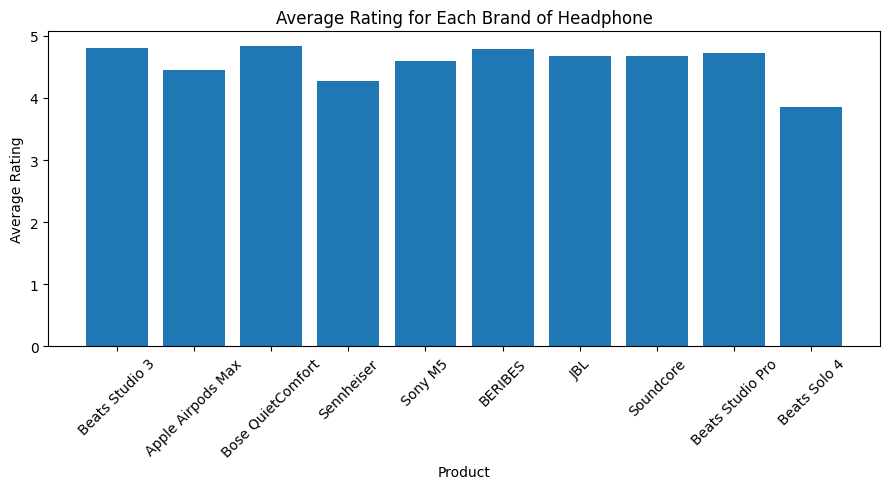

In [91]:
# Initialize variables to store subset means
subset_means = []

# Calculate mean ratings for each subset of 100 rows
for start in range(0, 1000, 100):
    subset_df = df.iloc[start:start + 100]
    mean_rating = subset_df['rating'].mean()
    subset_means.append(mean_rating)

# Create categories for each subset
product_labels = ['Beats Studio 3', 'Apple Airpods Max', 'Bose QuietComfort', 'Sennheiser', 'Sony M5', 'BERIBES', 'JBL', 'Soundcore', 'Beats Studio Pro', 'Beats Solo 4']
# Create the bar chart
plt.figure(figsize=(9, 5))
plt.bar(product_labels, subset_means)
plt.title('Average Rating for Each Brand of Headphone')
plt.xlabel('Product')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


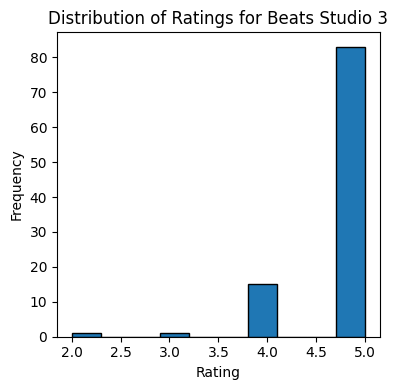

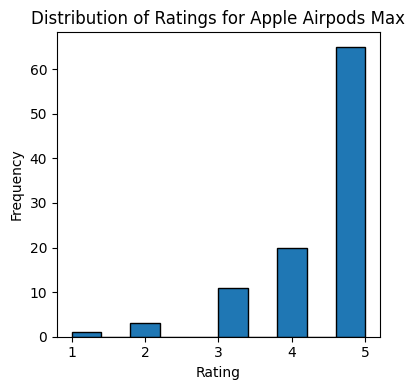

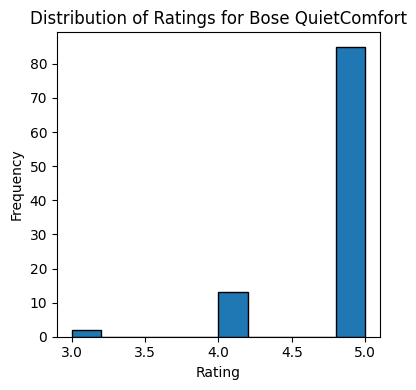

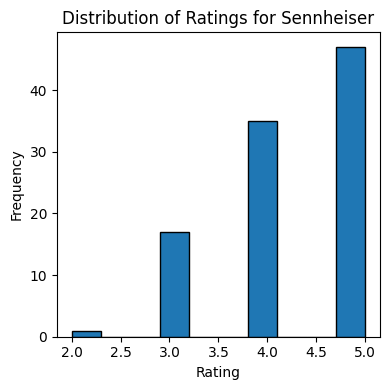

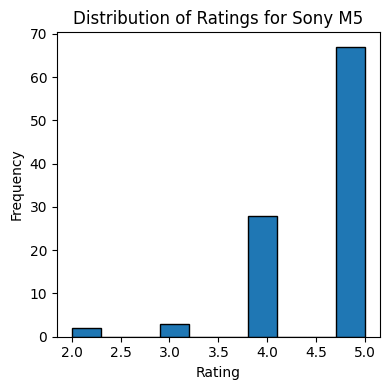

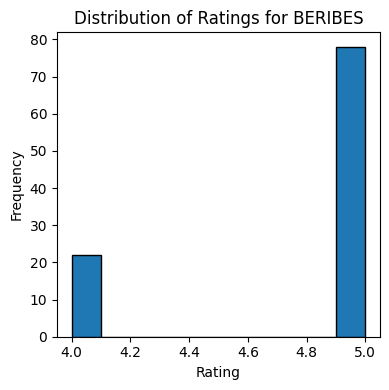

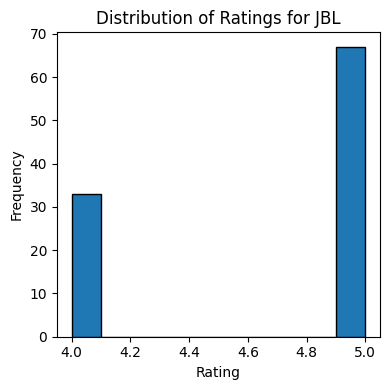

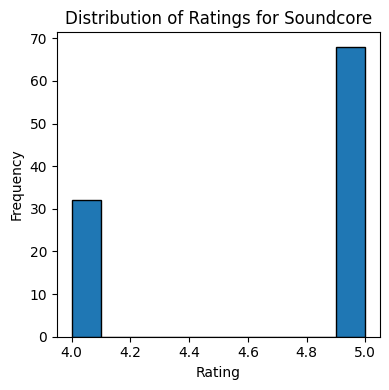

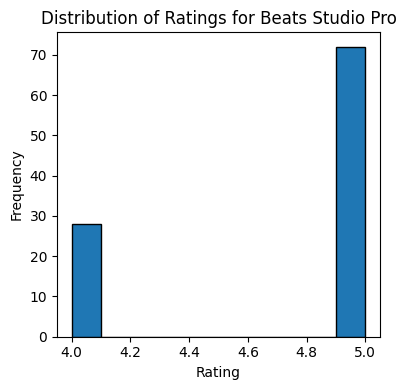

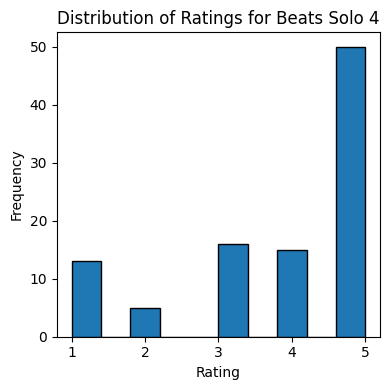

In [68]:
#Frequencies of each Rating for each Headphone

#Beats Studio 3
subset_df = df.iloc[1:101]
plt.figure(figsize=(4, 4))
plt.hist(subset_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings for Beats Studio 3')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#Apple Airpods Max
subset_df = df.iloc[101:201]
plt.figure(figsize=(4, 4))
plt.hist(subset_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings for Apple Airpods Max')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#Bose
subset_df = df.iloc[201:301]
plt.figure(figsize=(4, 4))
plt.hist(subset_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings for Bose QuietComfort')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#Sennheiser
subset_df = df.iloc[301:401]
plt.figure(figsize=(4, 4))
plt.hist(subset_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings for Sennheiser')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#Sony M5
subset_df = df.iloc[401:501]
plt.figure(figsize=(4, 4))
plt.hist(subset_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings for Sony M5')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#Beribes
subset_df = df.iloc[501:601]
plt.figure(figsize=(4, 4))
plt.hist(subset_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings for BERIBES')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#JBL
subset_df = df.iloc[601:701]
plt.figure(figsize=(4, 4))
plt.hist(subset_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings for JBL')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#Soundcore
subset_df = df.iloc[701:801]
plt.figure(figsize=(4, 4))
plt.hist(subset_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings for Soundcore')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#Beats Studio Pro
subset_df = df.iloc[801:901]
plt.figure(figsize=(4, 4))
plt.hist(subset_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings for Beats Studio Pro')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#Beats Solo 4
subset_df = df.iloc[901:1000]
plt.figure(figsize=(4, 4))
plt.hist(subset_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings for Beats Solo 4')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

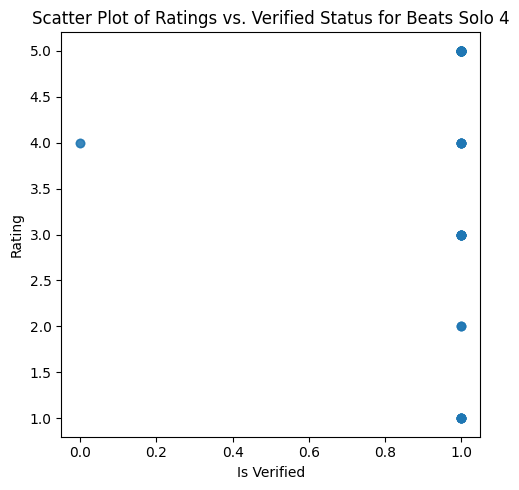

In [54]:
# Subset the dataframe for rows 901 to 1001
subset_df = df.iloc[901:1001]

# Create the scatter plot with 'is_verified' and 'rating' for the subset of rows 901-1001
# checking to see if there are any spam reviews of unverified buyers
plt.figure(figsize=(5, 5))
plt.scatter(subset_df['is_verified'], subset_df['rating'], alpha=0.5)
plt.title('Scatter Plot of Ratings vs. Verified Status for Beats Solo 4')
plt.xlabel('Is Verified')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


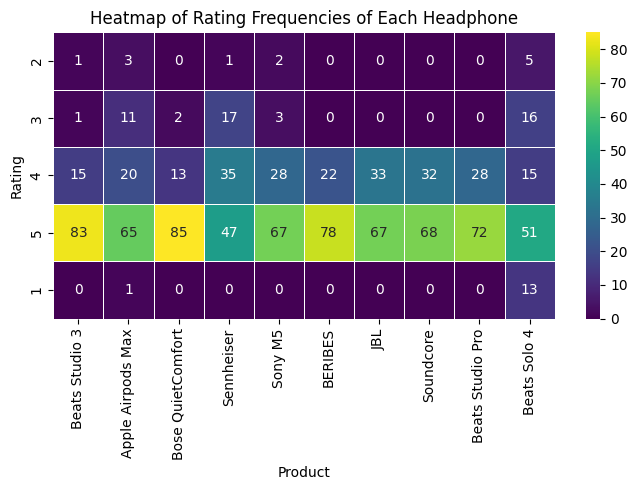

In [92]:
# Initialize the list to store data for each subset
subset_ratings = []

# Divide the data into subsets of 100 rows each and calculate rating frequencies
for start in range(0, 1000, 100):
    subset_df = df.iloc[start:start + 100]
    rating_counts = subset_df['rating'].value_counts().sort_index()
    subset_ratings.append(rating_counts)

# Convert the list of rating frequencies to a DataFrame
heatmap_data = pd.DataFrame(subset_ratings).fillna(0).T

# Assign the provided product labels to each subset
product_labels = ['Beats Studio 3', 'Apple Airpods Max', 'Bose QuietComfort', 'Sennheiser', 'Sony M5',
                  'BERIBES', 'JBL', 'Soundcore', 'Beats Studio Pro', 'Beats Solo 4']
heatmap_data.columns = product_labels

# Create the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', linewidths=.5)
plt.title('Heatmap of Rating Frequencies of Each Headphone')
plt.xlabel('Product')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


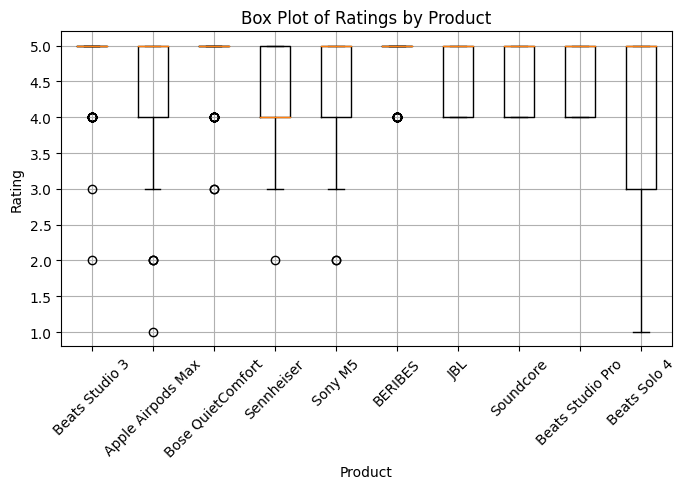

In [67]:
# Initialize the list to store data for each subset
subset_ratings = []

# Divide the data into subsets of 100 rows each and store the ratings
for start in range(0, 1000, 100):
    subset_df = df.iloc[start:start + 100]
    subset_ratings.append(subset_df['rating'])

# Assign the provided product labels to each subset
product_labels = ['Beats Studio 3', 'Apple Airpods Max', 'Bose QuietComfort', 'Sennheiser', 'Sony M5',
                  'BERIBES', 'JBL', 'Soundcore', 'Beats Studio Pro', 'Beats Solo 4']

# Create the box plots
plt.figure(figsize=(7, 5))
plt.boxplot(subset_ratings, labels=product_labels)
plt.title('Box Plot of Ratings by Product')
plt.xlabel('Product')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


***CORRELATION ANALYSIS***

In [71]:
# Initialize the list to store correlation for each subset
subset_correlations = []

# Divide the data into subsets of 100 rows each and calculate the correlation
for start in range(0, 1000, 100):
    subset_df = df.iloc[start:start + 100]
    correlation = subset_df['rating'].corr(subset_df['helpful_count'])
    subset_correlations.append(correlation)

# Assign the provided product labels to each subset
product_labels = ['Beats Studio 3', 'Apple Airpods Max', 'Bose QuietComfort', 'Sennheiser', 'Sony M5',
                  'BERIBES', 'JBL', 'Soundcore Anker', 'Beats Studio Pro', 'Beats Solo 4']

# Create a DataFrame for visualization
correlation_df = pd.DataFrame({'Product': product_labels, 'Correlation': subset_correlations})

# Print the correlations
print(correlation_df)



             Product  Correlation
0     Beats Studio 3    -0.613824
1  Apple Airpods Max    -0.126947
2  Bose QuietComfort    -0.005779
3         Sennheiser     0.133810
4            Sony M5    -0.310444
5            BERIBES     0.025514
6                JBL    -0.110004
7    Soundcore Anker     0.093710
8   Beats Studio Pro     0.009070
9       Beats Solo 4    -0.126987


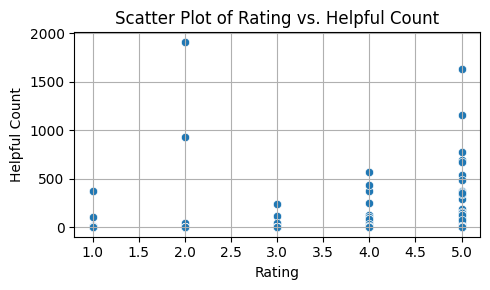

Covariance Matrix: -7.074198198198205
Correlation Matrix: -0.08362307064559373


In [82]:
# Create a scatter plot
# variables rating and helpful count
plt.figure(figsize=(5, 3))
sns.scatterplot(x=df['rating'], y=df['helpful_count'])
plt.title('Scatter Plot of Rating vs. Helpful Count')
plt.xlabel('Rating')
plt.ylabel('Helpful Count')
plt.grid(True)
plt.tight_layout()
plt.show()
correlation = df['rating'].corr(df['helpful_count'])

# Calculate covariance matrix
cov_matrix = df['rating'].cov(df['helpful_count'])
print("Covariance Matrix:", cov_matrix)

# Calculate correlation matrix
corr_matrix = df['rating'].corr(df['helpful_count'])
print("Correlation Matrix:", corr_matrix)




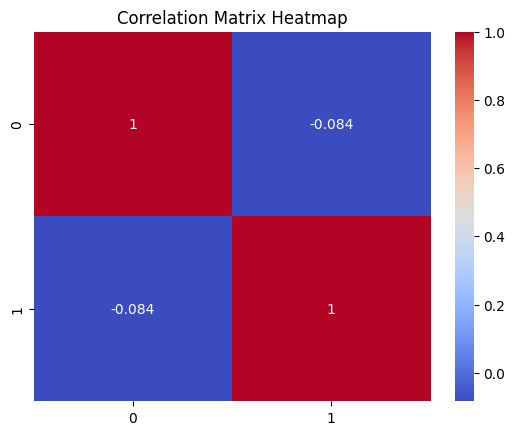

In [77]:
#Heatmap of the correlation matrix
corr_matrix = np.corrcoef(df['rating'], df['helpful_count'])
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

**SENTIMENT ANALYSIS**

In [87]:
# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on titles
df['sentiment'] = df['title'].apply(lambda x: sia.polarity_scores(x))

# Extract sentiment scores into separate columns
df['neg'] = df['sentiment'].apply(lambda x: x['neg'])
df['neu'] = df['sentiment'].apply(lambda x: x['neu'])
df['pos'] = df['sentiment'].apply(lambda x: x['pos'])
df['compound'] = df['sentiment'].apply(lambda x: x['compound'])

# Display the results
print(df[['title', 'neg', 'neu', 'pos', 'compound']])


                                                 title  neg    neu    pos  \
0                 5.0 out of 5 stars Great headphones!  0.0  0.532  0.468   
1                 5.0 out of 5 stars Great Headphones!  0.0  0.532  0.468   
2                       5.0 out of 5 stars Works great  0.0  0.549  0.451   
3                             5.0 out of 5 stars Whew!  0.0  1.000  0.000   
4                5.0 out of 5 stars amazing headphones  0.0  0.568  0.432   
..                                                 ...  ...    ...    ...   
995  1.0 out of 5 stars Do NOT purchase with AppleC...  0.0  1.000  0.000   
996                  1.0 out of 5 stars Is being used!  0.0  1.000  0.000   
997  4.0 out of 5 stars Comfy, but audio requires e...  0.0  1.000  0.000   
998  4.0 out of 5 stars Excellent Battery Life but ...  0.0  0.640  0.360   
999                            4.0 out of 5 stars Good  0.0  0.580  0.420   

     compound  
0      0.6588  
1      0.6588  
2      0.6249  
3      0.00

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [94]:

# Perform sentiment analysis on text reviews
df['sentiment'] = df['title'].apply(lambda x: sia.polarity_scores(x))

# Classify reviews into positive, negative, and neutral
df['sentiment_class'] = df['sentiment'].apply(lambda x: 'positive' if x['compound'] > 0.05 else ('negative' if x['compound'] < -0.05 else 'neutral'))

# Initialize lists to store results for each subset
subset_sentiments = []
subset_aggregates = []

# Divide the data into subsets of 100 rows each
for start in range(0, len(df), 100):
    subset_df = df.iloc[start:start + 100]
    subset_sentiments.append(subset_df['sentiment_class'].value_counts())
    subset_aggregates.append(subset_df['sentiment'].apply(pd.Series).mean())

# Assign the provided product labels to each subset
product_labels = ['Beats Studio 3', 'Apple Airpods Max', 'Bose QuietComfort', 'Sennheiser', 'Sony M5',
                  'BERIBES', 'JBL', 'Soundcore Anker', 'Beats Studio Pro', 'Beats Solo 4']

# Create DataFrames for visualization
sentiments_df = pd.DataFrame(subset_sentiments).fillna(0)
sentiments_df.index = product_labels
aggregates_df = pd.DataFrame(subset_aggregates).fillna(0)
aggregates_df.index = product_labels

# Display the sentiment classification counts
print("Sentiment Classification Counts:")
print(sentiments_df)

# Display the sentiment aggregates
print("\nSentiment Aggregates:")
print(aggregates_df)



Sentiment Classification Counts:
sentiment_class    positive  neutral  negative
Beats Studio 3           66       31         3
Apple Airpods Max        68       26         6
Bose QuietComfort        74       24         2
Sennheiser               56       29        15
Sony M5                  71       20         9
BERIBES                  78       19         3
JBL                      74       20         6
Soundcore Anker          76       20         4
Beats Studio Pro         71       26         3
Beats Solo 4             50       30        20

Sentiment Aggregates:
                       neg      neu      pos  compound
Beats Studio 3     0.01054  0.73383  0.25562  0.347512
Apple Airpods Max  0.02038  0.72894  0.25068  0.366465
Bose QuietComfort  0.00862  0.71171  0.27968  0.417802
Sennheiser         0.05865  0.73621  0.20511  0.250142
Sony M5            0.03390  0.71306  0.25303  0.353444
BERIBES            0.01012  0.69416  0.29572  0.439011
JBL                0.01772  0.70019  0.282

**Conclusion**

*Dataset Overview*
- Customer reviews for various headphone products: Beats Studio 3, Apple Airpods Max, Bose QuietComfort, Sennheiser, Sony M5, BERIBES, JBL, Soundcore Anker, Beats Studio Pro, and Beats Solo 4.
- Key columns: title, author, rating, content, timestamp, profile_id, is_verified, helpful_count, and product_attributes.

*Average Ratings*
- Overall Trend: The average ratings for all the headphones are within a similar range, reflecting general consumer satisfaction.
- Lower-End Ratings: Sennheiser and Beats Solo 4 had the lowest average ratings among the products analyzed.
- Higher-End Ratings: Beats Studio 3 and Bose QuietComfort received the highest average ratings, indicating strong consumer approval.
- Dominance of 5-Star Reviews: Most reviews were 5-star,top headphone products on Amazon.
- Variety in Reviews: Beats Solo 4 had the most varied ratings, with some 1-3 star reviews.

*Verified vs. Non-Verified Buyers*
- Verified Buyers: For Beats Solo 4, the scatter plot analysis showed that most ratings came from verified buyers, suggesting the presence of genuine reviews (checking for fake users writing poor ewviews)

*Heatmap of Ratings and Products*
- High Ratings: Products like Beats Studio 3 and Apple Airpods Max predominantly received high ratings (4 and 5 stars).
- Mixed Ratings: Beats Solo 4 had a diverse range of ratings, suggesting mixed consumer experiences. This could mean certain features are well-received while others are not.

*Box Plot Analysis and Skewness*
- Outliers: Some lower ratings were observed as outliers. This suggests that while these are top headphone companies, there are occasional customer complaints.
- Abnormal Ratings: Investigating these abnormal ratings could provide insights into specific issues and help improve product features or customer satisfaction.

*Correlation Between Ratings and Helpful Count*
- Beats Studio 3: There is a strong negative correlation (-0.613824) between helpful_count and rating. This indicates that higher-rated reviews are often considered less helpful, or lower-rated reviews are deemed more helpful.
- Other Products: Most other products did not exhibit a strong correlation between ratings and helpfulness, indicating that helpful reviews can come from both high and low ratings.

*Sentiment Analysis*
- Overall Sentiment: The sentiment analysis showed predominantly positive reviews across most products.
- Negative Sentiments: Sennheiser and Beats Solo 4 had the highest proportion of negative reviews.
- Positive Sentiments: JBL, Anker, and BERIBES had the most positive reviews, highlighting consumer satisfaction with these products.


*Overall*
- These headphone products are all highly rated on Amazon.
- **Beats Studio 3**, **Apple Airpods Max**, **Bose QuietComfort** received higher average ratings, reflecting strong consumer approval.
- **Beats Solo 4** showed more varied ratings and the highest proportion of negative reviews, indicating mixed consumer experiences.
  - Crucial to address the issues highlighted in the lower ratings to
  further solidify Beat's position in this competitive market.